TO-DOs:

INCIDENT FILE
- COMPLETED: Parse-out the time from the date/time columns  (Converted to datetime)
- COMPLETED: Calculate the arrival times
- COMPLETED: Create FINAL dataframe for our assignments

STATION FILE
- COMPLETED: Only contain CLV stations


ASSIGNMENTS:
- IN PROGRESS: Google map the CLV station on a map?  (Margot)
- IN PROGRESS: Add clicable names to the pins?  (Margot)
- IN PROGRESS: Pie chart for incident type (Saeger)
- IN PROGRESS: Bar chart by incident for each station (Saeger)
- IN PROGRESS: Bar chart by response time for each station (Saeger)
- ASSIGNED: Hypothesis Testing (Anji)
        - Boxplots?
        - Determine Mean vs Median based on number of outliers?
- ASSIGNED: Trends - number of incidents by month compared to previous years (George)
- ASSIGNED: Trends - Avg response time by month compared to previous years (George)
- TBD: Pick the highest performing station (lowest avg response times) vs least performing station (highest avg response times)  and look into why  (Further charting for each?)
- TBD: Quality control & code clean-up


In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# DEPENDENCIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import requests
import json

# Declare variables for each CSV file
incident_file_df1114 = "data/Fire_Department_Incident_Count - 2011-2014.csv"
incident_file_df1516 = "data/Fire_Department_Incident_Count - 2015-2016.csv"
incident_file_df1718 = "data/Fire_Department_Incident_Count - 2017-2018.csv"
fire_station_data =  "data/Clark_County_Fire_Stations.csv"

#import gmaps
import gmaps

# Import API key
from configure import g_key

PROCESS INCIDENT DATA HERE

In [3]:
# Step 1: bring-in 2011-2014 data into a df

incident_file_df1718 = pd.read_csv(incident_file_df1718)
print(f"# of rows in 2017-2018 DF: {len(incident_file_df1718)}")

incident_file_df1516 = pd.read_csv(incident_file_df1516)
print(f"# of rows in 2014-2015 DF: {len(incident_file_df1516)}")

incident_file_df1114 = pd.read_csv(incident_file_df1114)
print(f"# of rows in 2011-2014 DF: {len(incident_file_df1114)}")

C:\Users\17737\anaconda3\envs\PythonData38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# of rows in 2017-2018 DF: 204040
# of rows in 2014-2015 DF: 207549
# of rows in 2011-2014 DF: 317543


In [4]:
# Concatonate previous DFs into a single dataframe

incident_file_df = pd.concat([incident_file_df1114, incident_file_df1516, incident_file_df1718])
incident_file_df = incident_file_df.dropna(how='any')
print(f"# of rows in complete file: {len(incident_file_df)}")

# of rows in complete file: 695296


In [5]:
# New DF with only the required columns and ignore the others

incident_file_lean_df = incident_file_df[["Station","Response_Date","Event_Type","First_Unit_Assigned","First_Unit_Arrived","Location","Location_1"]]
incident_file_lean_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1
0,Station 4,2011/07/01 00:00:00+00,Medical,2011/07/01 00:01:00+00,7/1/2011 0:06,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)"
1,Station 44,2011/07/01 00:05:00+00,Medical,2011/07/01 00:06:00+00,7/1/2011 0:12,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)"
2,Station 3,2011/07/01 00:22:00+00,Fire,2011/07/01 00:24:00+00,7/1/2011 0:27,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)"
3,Station 10,2011/07/01 00:22:00+00,Medical,2011/07/01 00:23:00+00,7/1/2011 0:29,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)"
4,Other,2011/07/01 00:23:00+00,Public Need,2011/07/01 00:24:00+00,7/1/2011 0:31,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)"


In [6]:
# Create new df for rows that DO NOT contain 'none' in the First_Unit_Arrived column
incident_file_clean_df = incident_file_lean_df[incident_file_lean_df["First_Unit_Arrived"] != "None"]

#incident_file_clean_df.count()

In [7]:
# Convert Assigned & Arrived times to DateTime, remove timezones
incident_file_clean_df["First_Unit_Assigned"] = pd.to_datetime(incident_file_clean_df["First_Unit_Assigned"])
incident_file_clean_df["First_Unit_Arrived"] = pd.to_datetime(incident_file_clean_df["First_Unit_Arrived"])
incident_file_clean_df["First_Unit_Assigned"] = incident_file_clean_df["First_Unit_Assigned"].dt.tz_localize(None)
#incident_file_clean_df.head()

<ipython-input-7-9cf21370cd8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_file_clean_df["First_Unit_Assigned"] = pd.to_datetime(incident_file_clean_df["First_Unit_Assigned"])
<ipython-input-7-9cf21370cd8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_file_clean_df["First_Unit_Arrived"] = pd.to_datetime(incident_file_clean_df["First_Unit_Arrived"])
<ipython-input-7-9cf21370cd8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [8]:
# Calculate Response Time column
incident_file_clean_df["Response Time"] = (incident_file_clean_df["First_Unit_Arrived"] - incident_file_clean_df["First_Unit_Assigned"])
incident_file_clean_df.head()

<ipython-input-8-febb9e82bec6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_file_clean_df["Response Time"] = (incident_file_clean_df["First_Unit_Arrived"] - incident_file_clean_df["First_Unit_Assigned"])


,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",0 days 00:05:00
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",0 days 00:06:00
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)",0 days 00:03:00
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",0 days 00:06:00
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)",0 days 00:07:00


In [9]:
# Perform analysis
#incident_file_clean_df.sort_values("Response Time",ascending=False)

In [10]:
#Create FINAL, cleaned dataframe, ready for analysis, charts, maps, and hypothesis testing!!!
incident_file_final_df = incident_file_clean_df[incident_file_clean_df["First_Unit_Arrived"] > 
                                                incident_file_clean_df["First_Unit_Assigned"]]

In [11]:
#incident_file_final_df.count()
#incident_file_final_df.sort_values("Response Time",ascending=False)
#incident_file_final_df.max()
#incident_file_final_df.max()
#incident_file_final_df.count()
incident_file_final_df.describe()

,Response Time
count,645681
mean,0 days 00:06:36.087281490
std,0 days 00:04:48.415253280
min,0 days 00:00:01
25%,0 days 00:04:00
50%,0 days 00:06:00
75%,0 days 00:07:58
max,1 days 02:03:00


PROCESS FIRE STATION DATA (MARGOT'S SECTION)

In [12]:
# Bring-in fire station data
station_df = pd.read_csv(fire_station_data)
print(f"# of rows in the Station data file: {len(station_df)}")
#station_df.head()

# of rows in the Station data file: 89


In [13]:
distinct_stations = incident_file_clean_df["Station"].unique()
clv_stations_df = station_df[station_df["CITY_CODE"] == "CLV"]
clv_stations_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,CITY_CODE,STATION_NUMBER,ENGINE,RESCUE,TRUCK,BATTALION,CAPABILITI,OTHER_UNIT,CONSTRUCTION_YEAR,LONG,LAT,ObjectId
0,STATION 1 - CLV,500 N CASINO CENTER BLVD,CLV,1,"1,201,301",1201301.0,1.0,1,ALS &ILS,"BAT1, Eng401&501,Res401,501,601,100,Sqaud1,ILS...",6/23/1984,-115.140593,36.175147,1
2,STATION 2 - CLV,900 S DURANGO DR,CLV,2,2,2.0,NaN,10,ALS,BAT10,12/1989,-115.278456,36.161596,3
3,STATION 3 - CLV,2645 W WASHINGTON AV,CLV,3,"3,203",3.0,3.0,1,ALS,CBRN3,12/18/1980,-115.177234,36.180656,4
4,STATION 4 - CLV,421 S 15TH ST,CLV,4,"4,204",4204.0,4.0,1,ALS & ILS,ILS4,12/1989,-115.131524,36.159943,5
5,STATION 5 - CLV,1020 HINSON ST,CLV,5,"5,205,555",5.0,NaN,10,ALS,"EMS1,ILS5",9/11/2004,-115.195485,36.160133,6


INCIDENT TYPES & COUNTS (SAEGER)

In [14]:
incident_file_clean_df["First_Unit_Assigned"]

0        2011-07-01 00:01:00
1        2011-07-01 00:06:00
2        2011-07-01 00:24:00
3        2011-07-01 00:23:00
4        2011-07-01 00:24:00
                 ...        
204032   2018-12-31 23:21:59
204034   2018-12-31 23:33:36
204035   2018-12-31 23:42:56
204036   2018-12-31 23:45:13
204038   2018-12-31 23:49:53
Name: First_Unit_Assigned, Length: 648952, dtype: datetime64[ns]

In [15]:
incident_file_clean_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",0 days 00:05:00
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",0 days 00:06:00
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)",0 days 00:03:00
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",0 days 00:06:00
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)",0 days 00:07:00


In [16]:
Stations = incident_file_clean_df["Station"].value_counts()

In [17]:
Stations.head(20)

Station 1      105687
Station 4       67998
Station 10      45263
Station 43      42398
Station 5       38707
Station 44      34599
Station 8       33683
Station 3       32707
Station 42      30090
Station 6       28766
Station 9       27597
Station 2       26188
Station 48      21036
Station 107     18875
Station 106     18781
Station 45      16096
Station 41      14282
Station 108     13213
Station 7       12914
Other            9269
Name: Station, dtype: int64

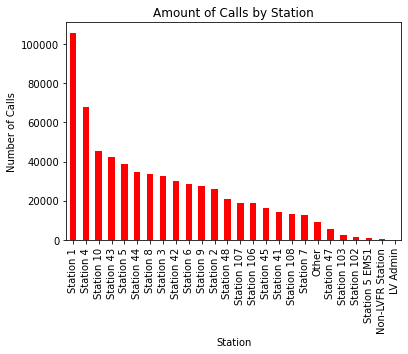

In [18]:
plot_pandas= Stations.plot(kind = "bar", color = 'red')
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.title("Amount of Calls by Station")
plt.show()

In [19]:
#Analyzing incidents by Event Type
Calls = incident_file_clean_df["Event_Type"].value_counts()

In [20]:
Calls

Medical        589331
Public Need     30710
Fire            21453
Other            7458
Name: Event_Type, dtype: int64

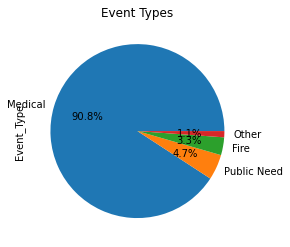

In [21]:
Calls.plot(kind='pie', y='Event_Type', startangle = 360, autopct ='%1.1f%%' )
plt.title("Event Types")
plt.show()

In [22]:
incident_file_clean_df.loc[incident_file_clean_df["Event_Type"] == "Medical"]

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",0 days 00:05:00
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",0 days 00:06:00
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",0 days 00:06:00
5,Station 44,2011/07/01 00:50:00+00,Medical,2011-07-01 00:51:00,2011-07-01 00:58:00,7300 block of Pinedale Ave,"(36.16988373, -115.2566223)",0 days 00:07:00
6,Station 43,2011/07/01 01:03:00+00,Medical,2011-07-01 01:03:00,2011-07-01 01:11:00,3000 block of N Jones Blvd,"(36.21485901, -115.2254562)",0 days 00:08:00
...,...,...,...,...,...,...,...,...
204030,Station 1,2018/12/31 23:03:55+00,Medical,2018-12-31 23:05:40,2018-12-31 23:11:00,300 block of Fremont St,"(36.1697998047, -115.143188477)",0 days 00:05:20
204032,Station 3,2018/12/31 23:19:26+00,Medical,2018-12-31 23:21:59,2018-12-31 23:28:00,100 block of S Martin L King Blvd,"(36.1717147827, -115.160774231)",0 days 00:06:01
204035,Station 10,2018/12/31 23:41:19+00,Medical,2018-12-31 23:42:56,2018-12-31 23:47:00,2000 block of S Las Vegas Blvd,"(36.1483764648, -115.154243469)",0 days 00:04:04
204036,Station 5,2018/12/31 23:43:26+00,Medical,2018-12-31 23:45:13,2018-12-31 23:51:00,3000 block of Kings Way,"(36.1418685913, -115.181999207)",0 days 00:05:47


RESPONSE TIMES ANALYSIS (GEORGE)

HYPOTHESIS TESTING (ANJI)

In [23]:
#Access maps with unique API key
gmaps.configure(api_key=g_key)

In [30]:
#create a map of Firehouse locations
station_locations = clv_stations_df[['LAT','LONG']]

fig = gmaps.figure()
markers = gmaps.marker_layer(station_locations)


   
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

In [ ]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

params = {"type" : "station",
          "keyword" : "station",
          "radius" : 50,
          "key" : g_key}

In [51]:
# Use the lat/lng we recovered to identify stations
for index, row in station_locations.iterrows():
    
    # get lat, lng 
    lat = row["LAT"]
    lng = row["LONG"]
  
    
    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"
    
    # Use the search term: "Stations" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # make request and print url
    station_name = requests.get(base_url, params=params)
    
    # convert to json
    station_name = station_name.json()
  
    
station_locations

,LAT,LONG
0,36.175147,-115.140593
2,36.161596,-115.278456
3,36.180656,-115.177234
4,36.159943,-115.131524
5,36.160133,-115.195485
6,36.152728,-115.233791
7,36.181790,-115.315397
8,36.247375,-115.242632
9,36.154419,-115.163678
25,36.286912,-115.260847


In [49]:
# # # Using the template add the station marks to the heatmap
info_box_template = """
<dl>
<dt>LAT</dt><dd>{LAT}</dd>
<dt>LONG</dt><dd>{LONG}</dd>
</dl>
"""

# # Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
station_info = [info_box_template.format(**row) for index, row instation_locations.iterrows()]
locations = station_locations["LAT", "LONG"]

SyntaxError: invalid syntax (<ipython-input-49-b3d09efe8e8b>, line 11)

In [50]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations,
    info_box_content=[f"Station loc: {rate}" for rate in hotel_info])

heatmap.add_layer(markers)

# Display Map w Markers atop of heatmap
heatmap

NameError: name 'locations' is not defined